# Smart Image Classifier Using Convolution Neural Network
This software automatically builds classification model for n-number of classes and no need to write a single line of code. The user just need to throw a dataset arranged in a very simple manner. The state of the art algorithms automatically normalizes the dataset according to the data and train it accordingly.

**Install these libraries:-**
1. Keras
2. Tensorflow
3. OpenCV
4. Matplotlib
5. Shutil
6. gTTS
7. playsound
8. cpuinfo

## Introduction:
You can skip this part as this part just reads out and print the instructions and has no connection with the rest of the code.

In [1]:
print("WELCOME TO SMART CLASSIFIER USING CONVOLUTION NEURAL NETWORK\n")
print("\n* Here you can classify 'n' number of classes using different models.")
print("* You can also create your own model with all possibe fine tuning.")
print("\nHow to arrange tha dataset?")
print("\nIf you have one folder containg all the images of different classes together, then-")
print("1. Differentiate all images of each classes and store them in different folders.")
print("2. Then store all the folder of different classes to a new mother folder.")
print("3. Store different images other than training images to a seperate folder that will be used for testing.")
input("\nPlease read the above lines and then press ENTER to continue.")

WELCOME TO SMART CLASSIFIER USING CONVOLUTION NEURAL NETWORK


* Here you can classify 'n' number of classes using different models.
* You can also create your own model with all possibe fine tuning.

How to arrange tha dataset?

If you have one folder containg all the images of different classes together, then-
1. Differentiate all images of each classes and store them in different folders.
2. Then store all the folder of different classes to a new mother folder.
3. Store different images other than training images to a seperate folder that will be used for testing.

Please read the above lines and then press ENTER to continue.


''

## Importing Libraries:

In [2]:
import keras
import os
import cv2
import random
import shutil
import time
import matplotlib
import glob
import operator
import psutil
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.models import Model
from keras.models import load_model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from shutil import copyfile

Using TensorFlow backend.
/home/rajarshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rajarshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rajarshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rajarshi/.local/lib/python3.7/site-packages/tensorflo

## Taking User Inputs for File Handling:

* All the images of different classes should be stored in different folders and should rename the folders using the name of the classes for better understanding.​

* These separate folders should be kept inside a folder which is known as **Source folder**.

* For Manual Validation of the generated model, the user needs to have some data stored in a separate folder which will be used for validation and the user will be able to see the corresponding labels of the validation data. This folder is known as **Test Folder**

In [3]:
source_address = str(input("Enter the address of the source folder: "))
source_folder = str(input("Enter the name of the source folder where all the classes are stored: "))
test_address = str(input("Enter the address of the test images which will be used for testing after training:  "))

Enter the address of the source folder: /home/rajarshi/Documents/OCT2017 
Enter the name of the source folder where all the classes are stored: train
Enter the address of the test images which will be used for testing after training:  /home/rajarshi/Documents/OCT2017 /val


In [4]:
source_folder_dir = source_address + '/' + source_folder + '/'

In [5]:
source_data = sum([len(files) for r, d, files in os.walk(source_folder_dir)])

## Sorting the files in terms of their size and fetching the smallest sized image

In [6]:
class_no = len(os.listdir(source_folder_dir))

classes = []
source_folder_dir_class = []
image_list = []
resized_images = []

files = {}
for i in range(0,class_no):
    i += 1
    classes = os.listdir(source_folder_dir)

    source_folder_dir_class.append(source_folder_dir + classes[i-1] + '/')
    
    for filename in os.listdir(source_folder_dir_class[i-1]):
        file = source_folder_dir_class[i-1] + filename
        extension = "." + str(filename.split(".")[-1])
        #print("The format of the images: " + str(extension))
        x = os.path.getsize(file) 
        files.update({file:x})
    
    sorted_files = sorted(files.items(), key=operator.itemgetter(1))
    img_src = sorted_files[0][0]

    image = cv2.imread(img_src)
    height = image.shape[0]
    width = image.shape[1]

In [7]:
print("The size(height*width) of the smallest image in this dataset is {}*{}".format(height,width))

The size(height*width) of the smallest image in this dataset is 496*512


## Custom vs Automated Learning:
* **If Custom learning is selected:-**
    1. The user will be able to **split the data** as per his/her choice to create training and validation directory.
    2. The user can **resize all the images**. The dimension of the resized images will be feeded to CNN.
    3. Incase of a small dataset the user can also apply **Data Augmentation** to increase the robustness of the model.
    4. The user can **customize all hyperparameters** including - 
        * Initial Learning Rate
        * Maximum Number of Epochs
        * Batch Size
        * Dropout Percentage
    5. The user can **early stop and monitor** the training using-
        * Validation Accuracy
        * Validation Loss
        * Training Accuracy
        * Training Loss
    6. If the user goes with **Transfer Learning**, he/she will be able to **train his/her desired number of layers**. The pretrained models are -
        * VGG16
        * VGG19
        * MobileNet
        * InceptionV3
    7. If the user goes with **custom model creation**, he/she will have to choose-
        * Number of Convolution Layer
        * Number of Filters/Kernals in 1st convolution layer
        * Size of Filters/Kernals
        * Number of Neuron in the dense layer
        * Activation Function for hidden layers
    8. The user can select his/her desired **optimizer** to train the model. The availabe optimizers are-
        * SGD
        * RMSprop
        * Adagrad
        * Adadelta
        * Adam
        * Adamax
        * Nadam
* **If Automated learning is selected:**
     All these above parameters will be selected according to the hardware configuration and dataset. The user will only be able to select between Transfer learning and Custom Pre-built Model for training.

## Creating Validation Directory:

In [8]:
directory = source_address + '/'  + 'classify ' + str(source_folder) + '/'
train_directory = directory + 'training' + '/'
validation_directory = directory + 'validation' + '/'
test_directory = directory + 'testing' + '/'

# If the generated target folder is not created yet
if not os.path.exists(directory):
    # Create the target folder
    os.mkdir(directory)
# If the generated target folder is already created
else:
    # Overwrite the target folder
    shutil.rmtree(directory)
    os.mkdir(directory)

os.mkdir(train_directory)
os.mkdir(validation_directory)
os.mkdir(test_directory)

## Splitting Data:
* The program will ask for the percentage of the data using which the user want to train his/her model.​

* Depending upon the user I/p, the program creates a new directory where all the data is stored inside a folder named `classify <source_folder name>`.​

* Inside this folder 2 folders are created named `training` & `validation`.

* Inside these 2 folders all the classes will be stored for training and validation.

In [9]:
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, VALIDATION_SPLIT_SIZE, TEST_SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring!")

    # Splitting the Data    
    validation_length = int(len(files) * VALIDATION_SPLIT_SIZE)
    testing_length = int(len(files) * TEST_SPLIT_SIZE)
    training_length = len(files) - (validation_length + testing_length)
    
    shuffled_set = random.sample(files, len(files))
    
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[(training_length):(training_length+validation_length)]
    testing_set = shuffled_set[(training_length+validation_length):(training_length+validation_length+testing_length)]

    # Copying the Data
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
        
    for filename in validation_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

## Loading the splitted data to the Validation Directory & Resizing & Renaming it:

In [10]:
VALIDATION_SPLIT_SIZE = int(input("Using how much data(%) you want to validate? "))
VALIDATION_SPLIT_SIZE = VALIDATION_SPLIT_SIZE/100

TEST_SPLIT_SIZE = int(input("Using how much data(%) you want to test? "))
TEST_SPLIT_SIZE = TEST_SPLIT_SIZE/100

train_class = []
validation_class = []
test_class = []

for i in range(0,class_no):
    i += 1

    train_class.append(train_directory + classes[i-1] + '/')
    validation_class.append(validation_directory + classes[i-1] + '/')
    test_class.append(test_directory + classes[i-1] + '/')

    os.mkdir(train_class[i-1])
    os.mkdir(validation_class[i-1])
    os.mkdir(test_class[i-1])

    split_data(source_folder_dir_class[i-1], train_class[i-1], validation_class[i-1], test_class[i-1], VALIDATION_SPLIT_SIZE, TEST_SPLIT_SIZE)

    print("\nSplitted the RAW data from " + str(source_folder_dir_class[i-1]) + " & storing it into 3 folders at:\n" + str(train_class[i-1]) + '\n' + str(validation_class[i-1]) + '\n' + str(test_class[i-1]))

Using how much data(%) you want to validate? 20
Using how much data(%) you want to test? 10

Splitted the RAW data from /home/rajarshi/Documents/OCT2017 /train/DME/ & storing it into 3 folders at:
/home/rajarshi/Documents/OCT2017 /classify train/training/DME/
/home/rajarshi/Documents/OCT2017 /classify train/validation/DME/
/home/rajarshi/Documents/OCT2017 /classify train/testing/DME/

Splitted the RAW data from /home/rajarshi/Documents/OCT2017 /train/DRUSEN/ & storing it into 3 folders at:
/home/rajarshi/Documents/OCT2017 /classify train/training/DRUSEN/
/home/rajarshi/Documents/OCT2017 /classify train/validation/DRUSEN/
/home/rajarshi/Documents/OCT2017 /classify train/testing/DRUSEN/

Splitted the RAW data from /home/rajarshi/Documents/OCT2017 /train/NORMAL/ & storing it into 3 folders at:
/home/rajarshi/Documents/OCT2017 /classify train/training/NORMAL/
/home/rajarshi/Documents/OCT2017 /classify train/validation/NORMAL/
/home/rajarshi/Documents/OCT2017 /classify train/testing/NORMAL/

In [11]:
cnn_size = 224

dim = []
resized_images = []

print("\n\nYou can resize the images to {}(h)*{}(w) or lower than that.".format(height,width))
height = int(input("Enter the height to which you want to resize all the images: "))
width = int(input("Enter the width to which you want to resize all the images: "))
    
# Renaming the images
for i in range(0,class_no):    
    a = 0
    for filename in os.listdir(train_class[i-1]):
        os.rename(train_class[i-1] + filename, train_class[i-1] + "img " + str(a) + extension)
        a += 1

    a = 0
    for filename in os.listdir(validation_class[i-1]):
        os.rename(validation_class[i-1] + filename, validation_class[i-1] + "img " + str(a) + extension)
        a += 1

    a = 0
    for filename in os.listdir(test_class[i-1]):
        os.rename(test_class[i-1] + filename, test_class[i-1] + "img " + str(a) + extension)
        a += 1
        
        
# Data-Processing
for i in range(0,class_no):
    a = 0
    for filename in os.listdir(train_class[i-1]):
        file = os.path.join(train_class[i-1], filename)
        
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        ret, thresh_gray = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        gray[thresh_gray == 255] = 0

        bbox = cv2.boundingRect(gray)
        x, y, w, h = bbox
        foreground = img[y:y+h, x:x+w]

        ret, thresh_foreground = cv2.threshold(foreground, 220, 255, cv2.THRESH_BINARY)
        foreground[thresh_foreground == 255] = 0
        
        res = cv2.resize(foreground, (width, height))
        resized_images.append(res)
        cv2.imwrite(train_class[i-1] + "img " + str(a) + extension, res)
        a+= 1
        dim = resized_images[0].shape
        

    a = 0
    for filename in os.listdir(validation_class[i-1]):
        file = os.path.join(validation_class[i-1], filename)
        
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        ret, thresh_gray = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        gray[thresh_gray == 255] = 0

        bbox = cv2.boundingRect(gray)
        x, y, w, h = bbox
        foreground = img[y:y+h, x:x+w]

        ret, thresh_foreground = cv2.threshold(foreground, 220, 255, cv2.THRESH_BINARY)
        foreground[thresh_foreground == 255] = 0
        
        res = cv2.resize(foreground, (width, height))
        resized_images.append(res)
        cv2.imwrite(validation_class[i-1] + "img " + str(a) + extension, res)
        a+= 1
        dim = resized_images[0].shape
        
    a = 0
    for filename in os.listdir(test_class[i-1]):
        file = os.path.join(test_class[i-1], filename)
        
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        ret, thresh_gray = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        gray[thresh_gray == 255] = 0

        bbox = cv2.boundingRect(gray)
        x, y, w, h = bbox
        foreground = img[y:y+h, x:x+w]

        ret, thresh_foreground = cv2.threshold(foreground, 220, 255, cv2.THRESH_BINARY)
        foreground[thresh_foreground == 255] = 0
        
        res = cv2.resize(foreground, (width, height))
        resized_images.append(res)
        cv2.imwrite(test_class[i-1] + "img " + str(a) + extension, res)
        a+= 1
        dim = resized_images[0].shape
        
dim = (dim[1], dim[0], dim[2])



You can resize the images to 496(h)*512(w) or lower than that.
Enter the height to which you want to resize all the images: 128
Enter the width to which you want to resize all the images: 128


In [12]:
print("\nThe images have been reshaped to(width * height * channel) " + str(dim) + " for the sake of normalization")
print("\nThe ", class_no, "classes of the data are = ",classes)


The images have been reshaped to(width * height * channel) (128, 128, 3) for the sake of normalization

The  4 classes of the data are =  ['DME', 'DRUSEN', 'NORMAL', 'CNV']


## Data Augmentation:

In [13]:
augmentation = []
print("This dataset contains total {} images".format(source_data)) 

augment = input(str("Augmenting data will make the model robust but it'll take more time to train. \nDo you want to augment the data?(Y/N) "))

if augment.upper() == 'Y':
    datagen = ImageDataGenerator(
        rescale=1/ 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
    augmentation.append('Data is Augmented')

elif augment.upper() == 'N':
    datagen = ImageDataGenerator(
        rescale=1/ 255)
    augmentation.append('Data is not Augmented')

This dataset contains total 83484 images
Augmenting data will make the model robust but it'll take more time to train. 
Do you want to augment the data?(Y/N) n


## Hyparparameter Tunining:

In [14]:
learning_rate = float(input("Enter the initial learning rate: "))
epoch = int(input("Enter the maximum number of epochs: "))
batch_size = int(input("Enter batch size: "))

Enter the initial learning rate: 0.0001
Enter the maximum number of epochs: 100
Enter batch size: 10


In [15]:
print("THE HYPERPARAMETERS ARE-")
print("Initial Learning Rate = ", learning_rate)
print("Maximum No. of epochs = ", epoch)
print("Batch Size = ", batch_size)

THE HYPERPARAMETERS ARE-
Initial Learning Rate =  0.0001
Maximum No. of epochs =  100
Batch Size =  10


## Folder for Performance Overview

In [16]:
import time
from datetime import date
today = date.today()
today = today.strftime("%d.%m")
t = time.ctime()
t = t[11:-5]

char = source_address + '/' + today + '-' + t
os.mkdir(char)

## Callbacks:-
### Early Stopping:

* The user can early stop the training by monitoring the any one of validation accuracy and validation loss.​

* This can help the model to prevent overfeeding.​

* If the monitored quality does not show any improvement for certain epochs(depends on RAM but customizable), the training will stop.

### Model Checkpoint:

* Saves the model after every epoch where the monitored quantity shows the best improvement.

### Learning Rate Scheduler: 

* $decay = \alpha * (0.1)^\frac{epoch}{10}$, i.e. the learning rate will show a decay by a factor of 0.1 after 10 epochs, if the maximum epoch is 100.

In [17]:
def lr_schedule(epoch):
    return learning_rate * (0.1 ** int(epoch / 10))
    
best_model_address = char + '/' + 'best_model.h5'

In [18]:
early_stop = str(input("Early stop prevents overfitting and sometimes it may result better output response. Do you want to early stop the training?(Y/N) "))

if early_stop.upper() == 'Y':
    print("\nMontoring Losses will consume more time to train the model but will return a perfect model with minimum losses.")
    monitor = int(input("Press 1 to monitor Validation Accuracy\nPress 2 to monitor Validation Loss\nPress 3 to monitor Training Accuracy\nPress 4 to monitor Training Loss\n"))
    patience = int(input('Enter number of epochs that will produce monitored quantity with no improvement after which training will be stopped: '))


    if monitor == 1:
        metric = 'val_accuracy'
        mode = 'max'
        print("\nMONITORING VALIDATION ACCURACY..........\n")

    elif monitor == 2:
        metric = 'val_loss'
        mode = 'min'
        print("\nMONITORING VALIDATION LOSS..........\n")

    elif monitor == 3:
        metric = 'accuracy'
        mode = 'max'
        print("\nMONITORING TRAINING ACCURACY..........\n")

    elif monitor == 4:
        metric = 'loss'
        mode = 'min'
        print("\nMONITORING TRAINING LOSS..........\n")

    callback = [keras.callbacks.callbacks.LearningRateScheduler(lr_schedule, verbose = 1),
                keras.callbacks.callbacks.EarlyStopping(monitor = metric, min_delta = 0.001, patience = patience, verbose=1, mode = mode, restore_best_weights = True),
                keras.callbacks.callbacks.ModelCheckpoint(best_model_address, monitor = metric, verbose=1, save_best_only=True, save_weights_only=False, mode = mode , period=1)]

    print("\nTraining will stop if Validation Accuracy doesn't show any improvements for " + str(patience) + " epcohs\n")

elif early_stop.upper() == 'N':
    monitor = int(input("Press 1 to monitor Validation Accuracy\nPress 2 to monitor Validation Loss\n"))

    if monitor == 1:
        metric = 'val_accuracy'
        mode = 'max'
        print("\nMONITORING VALIDATION ACCURACY..........\n")

    elif monitor == 2:
        metric = 'val_loss'
        mode = 'min'
        print("\nMONITORING VALIDATION LOSS..........\n")

    elif monitor == 3:
        metric = 'accuracy'
        mode = 'max'
        print("\nMONITORING TRAINING ACCURACY..........\n")

    elif monitor == 4:
        metric = 'loss'
        mode = 'min'
        print("\nMONITORING TRAINING LOSS..........\n")


    callback = [keras.callbacks.callbacks.LearningRateScheduler(lr_schedule, verbose = 1),
                keras.callbacks.callbacks.ModelCheckpoint(best_model_address, monitor = metric, verbose = 1, save_best_only = True, save_weights_only = False, mode = mode, period = 1)]

Early stop prevents overfitting and sometimes it may result better output response. Do you want to early stop the training?(Y/N) y

Montoring Losses will consume more time to train the model but will return a perfect model with minimum losses.
Press 1 to monitor Validation Accuracy
Press 2 to monitor Validation Loss
Press 3 to monitor Training Accuracy
Press 4 to monitor Training Loss
4
Enter number of epochs that will produce monitored quantity with no improvement after which training will be stopped: 5

MONITORING TRAINING LOSS..........


Training will stop if Validation Accuracy doesn't show any improvements for 5 epcohs



## Model Creation:
* Transfer Learning using Pre-trained models - 
    * VGG16
    * VGG19
    * MobileNet
    * InceptionV3

* Custom Model
* Small Model for 64*64 images

In [19]:
def vgg16():
    print("\nTRAINING ON VGG16 MODEL:-")

    base_model = keras.applications.vgg16.VGG16(input_shape = dim, weights = 'imagenet', include_top = False)

    x = base_model.output
    x = GlobalMaxPooling2D()(x)
    x = Dense(dense, activation=activation)(x)
    x = Dropout(dropout)(x)
    x = BatchNormalization()(x)

    predictions = Dense(output_layer, activation = output_activation)(x)

    model = Model(inputs = base_model.input, outputs=predictions)

    train_base_model = str(input("Do you want to train the base model of VGG16?(Y/N) "))
    if train_base_model.upper() == 'Y':
        for layer in base_model.layers:
            layer.trainable = True
    elif train_base_model.upper() == 'N':
        for layer in base_model.layers:
            layer.trainable = False

    return model


def vgg19():
    print("\nTRAINING ON VGG19 MODEL:-")

    base_model = keras.applications.vgg19.VGG19(input_shape = dim, weights = 'imagenet', include_top = False)

    x = base_model.output
    x = GlobalMaxPooling2D()(x)
    x = Dense(dense, activation=activation)(x)
    x = Dropout(dropout)(x)
    x = BatchNormalization()(x)

    predictions = Dense(output_layer, activation = output_activation)(x)

    model = Model(inputs = base_model.input, outputs=predictions)

    train_base_model = str(input("Do you want to train the base model of vgg19?(Y/N) "))
    if train_base_model.upper() == 'Y':
        for layer in base_model.layers:
            layer.trainable = True
    elif train_base_model.upper() == 'N':
        for layer in base_model.layers:
            layer.trainable = False

    return model


def MobileNet():
    print("\nTRAINING ON MobileNet MODEL:-")

    base_model = keras.applications.mobilenet.MobileNet(input_shape = dim, weights = 'imagenet', include_top = False)

    x = base_model.output
    x = GlobalMaxPooling2D()(x)
    x = Dense(dense, activation=activation)(x)
    x = Dropout(dropout)(x)
    x = BatchNormalization()(x)

    predictions = Dense(output_layer, activation = output_activation)(x)

    model = Model(inputs = base_model.input, outputs=predictions)

    train_base_model = str(input("Do you want to train the base model of MobileNet?(Y/N) "))
    if train_base_model.upper() == 'Y':
        for layer in base_model.layers:
            layer.trainable = True
    elif train_base_model.upper() == 'N':
        for layer in base_model.layers:
            layer.trainable = False

    return model


def InceptionV3():
    print("\nTRAINING ON InceptionV3 MODEL:-")
    
    base_model = keras.applications.inception_v3.InceptionV3(input_shape = dim, weights = 'imagenet', include_top = False)

    x = base_model.output
    x = GlobalMaxPooling2D()(x)
    x = Dense(dense, activation=activation)(x)
    x = Dropout(dropout)(x)
    x = BatchNormalization()(x)

    predictions = Dense(output_layer, activation = output_activation)(x)

    model = Model(inputs = base_model.input, outputs=predictions)

    train_base_model = str(input("Do you want to train the base model of InceptionV3?(Y/N) "))
    if train_base_model.upper() == 'Y':
        for layer in base_model.layers:
            layer.trainable = True
    elif train_base_model.upper() == 'N':
        for layer in base_model.layers:
            layer.trainable = False

    return model


def ResNet50():
    print("\nTRAINING ON ResNet50 MODEL:-")

    base_model = keras.applications.resnet.ResNet50(input_shape = dim, weights = 'imagenet', include_top = False)

    x = base_model.output
    x = GlobalMaxPooling2D()(x)
    x = Dense(dense, activation=activation)(x)
    x = Dropout(dropout)(x)
    x = BatchNormalization()(x)

    predictions = Dense(output_layer, activation = output_activation)(x)

    model = Model(inputs = base_model.input, outputs=predictions)

    train_base_model = str(input("Do you want to train the base model of ResNet50?(Y/N) "))
    if train_base_model.upper() == 'Y':
        for layer in base_model.layers:
            layer.trainable = True
    elif train_base_model.upper() == 'N':
        for layer in base_model.layers:
            layer.trainable = False

    return model


def Custom_Model():
    print("\nTRAINING ON A COMPLEX CUSTOM MODEL:-")
    
    model = keras.models.Sequential()
    for l in range(layer):
        l += 1
        m = (2**l)//2
        for c in range(conv_layer):
            model.add(Conv2D(conv*m, (conv_size, conv_size), padding = 'same', input_shape = dim, activation = activation))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(dense, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(output_layer, activation=output_activation))
    
    return model


def Pretrained_Custom_Model():
    model_address = str(input("Enter the address of the model: "))
    model_name = str(input("Enter the name of the model: "))
    model_dir = os.path.join(model_address, model_name)
    
    model = load_model(model_dir)
    model.summary()
    
    train_layers = str(input("Do you want to train all layers? "))
    if train_layers.upper() == 'Y':
        for layers in model.layers:
            layers.trainable = True
    
    elif train_layers.upper() == 'N':
        trainables = int(input("How many number of layers you want to train? "))
        for layers in model.layers[:-trainables]:
            print("The trainable layers are:\n ", layers)
            layers.trainable = False
        
    return model

In [20]:
if class_no > 2:
    print("This is a " + str(class_no) + "-Class Classification")
    output_activation = 'softmax'
    losses = 'categorical_crossentropy'
    class_mode = 'categorical'
    output_layer = class_no
else:
    print("This is a Binary Classification")
    output_activation = 'sigmoid'
    losses = 'binary_crossentropy'
    class_mode = 'binary'
    output_layer = 1

This is a 4-Class Classification


## Optimizer Selection:
The user can select between
1. SGD
2. RMSprop
3. Adagrad
4. Adadelta
5. Adam
6. Adamax
7. Nadam

In [21]:
def optimizer_selection():
    print("CTRL + Click here https://towardsdatascience.com/optimization-algorithms-in-deep-learning-191bfc2737a4 to know about optimizers.")
    print("\nSelect a optimizer which will reduce the loss of the model.\n")

    optimizer_select = int(input("Press 1 to select Stochastic Gradient Descent\nPress 2 to select RMSprop\nPress 3 to select Adagrad\nPress 4 to select Adadelta\nPress 5 to select Adam\nPress 6 to select Adamax\nPress 7 to select Nadam\n"))

    if optimizer_select == 1:
        optimizer = keras.optimizers.SGD(lr = learning_rate, decay = 1e-6, momentum = 0.9, nesterov = True)

    elif optimizer_select == 2:
        optimizer = keras.optimizers.RMSprop(learning_rate, rho = 0.9)

    elif optimizer_select == 3:
        optimizer = keras.optimizers.Adagrad(learning_rate)

    elif optimizer_select == 4:
        optimizer = keras.optimizers.Adadelta(learning_rate, rho = 0.95)

    elif optimizer_select == 5:
        optimizer = keras.optimizers.Adam(learning_rate = learning_rate, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

    elif optimizer_select == 6:
        optimizer = keras.optimizers.Adamax(learning_rate = learning_rate, beta_1 = 0.9, beta_2 = 0.999)

    elif optimizer_select == 7:
        optimizer = keras.optimizers.Nadam(learning_rate = learning_rate, beta_1 = 0.9, beta_2 = 0.999)
   
    return optimizer

## Training:

In [22]:
TRAINING_DIR = train_directory
train_datagen = datagen
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = batch_size,
                                                    class_mode = class_mode,
                                                    target_size = (dim[0],dim[1]),
                                                    shuffle=True)

VALIDATION_DIR = validation_directory
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size = batch_size,
                                                              class_mode = class_mode,
                                                              target_size = (dim[0],dim[1]),
                                                              shuffle=True)

TESTING_DIR = test_directory
test_datagen = ImageDataGenerator(rescale=1.0/255.)
test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size = batch_size,
                                                  class_mode = class_mode,
                                                  target_size = (dim[0],dim[1]),
                                                  shuffle=True)

Found 58442 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 8346 images belonging to 4 classes.


In [23]:
labels = validation_generator.class_indices

In [24]:
tl_models = int(input("\nPress 1 to train using pre-trained VGG16 Model\nPress 2 to train using pre-trained VGG19 Model\nPress 3 to train using pre-trained MobilNet Model\nPress 4 to train using pre-trained ImageNet Model\nPress 5 to train using pre-trained ResNet50 Model\nPress 6 to create your own Model\nPress 7 to train using previously trained Custom Model\n"))
    
optimizer = optimizer_selection()
    
if tl_models == 7:
    model = Pretrained_Custom_Model() 
    
else:
    dense = int(input("Enter the no. of neurons in dense layer: "))
    activation = str(input("Enter the activation function: "))
    dropout = float(input("Enter the dropout percentage: "))
    dropout = dropout/100

    if tl_models == 1: 
        model= vgg16()

    elif tl_models == 2:
        model = vgg19()

    elif tl_models == 3:
        model = MobileNet()

    elif tl_models == 4:
        model = InceptionV3() 

    elif tl_models == 5:
        model = ResNet50()

    elif tl_models == 6:
        print("\nThe images have been resized to " + str(dim))
        layer = int(input("Enter number of layers you want to apply: "))
        conv_layer = int(input("Enter number of convolution layers you want to apply: "))
        conv = int(input("Enter the no. of filters in the 1st convolution layer: "))
        conv_size = int(input("Enter the size of filters: "))

        model = Custom_Model()
    
    
model.compile(optimizer = optimizer, loss = losses, metrics = ['accuracy'])
model.summary()

start = time.time()
history = model.fit_generator(train_generator,
                                    epochs = epoch,
                                    verbose = 1,
                                    callbacks = callback,
                                    validation_data = validation_generator,
                                    shuffle=True)

end = time.time()
duration = end-start

train_score = model.evaluate(train_generator)
val_score = model.evaluate(validation_generator)
test_score = model.evaluate(test_generator)

model_weight = "weight.h5"
model_weight_address = char + '/' + model_weight
model.save_weights(model_weight_address)


Press 1 to train using pre-trained VGG16 Model
Press 2 to train using pre-trained VGG19 Model
Press 3 to train using pre-trained MobilNet Model
Press 4 to train using pre-trained ImageNet Model
Press 5 to train using pre-trained ResNet50 Model
Press 6 to create your own Model
Press 7 to train using previously trained Custom Model
6
CTRL + Click here https://towardsdatascience.com/optimization-algorithms-in-deep-learning-191bfc2737a4 to know about optimizers.

Select a optimizer which will reduce the loss of the model.

Press 1 to select Stochastic Gradient Descent
Press 2 to select RMSprop
Press 3 to select Adagrad
Press 4 to select Adadelta
Press 5 to select Adam
Press 6 to select Adamax
Press 7 to select Nadam
5
Enter the no. of neurons in dense layer: 256
Enter the activation function: relu
Enter the dropout percentage: 30

The images have been resized to (128, 128, 3)
Enter number of layers you want to apply: 5
Enter number of convolution layers you want to apply: 2
Enter the no. 

5845/5845 [==============================] - 1487s 254ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0639 - val_accuracy: 0.9403

Epoch 00012: loss improved from 0.00907 to 0.00472, saving model to /home/rajarshi/Documents/OCT2017 /30.03-00:37:01/best_model.h5
Epoch 13/100

Epoch 00013: LearningRateScheduler setting learning rate to 1e-05.
5845/5845 [==============================] - 1489s 255ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0203 - val_accuracy: 0.9392

Epoch 00013: loss improved from 0.00472 to 0.00376, saving model to /home/rajarshi/Documents/OCT2017 /30.03-00:37:01/best_model.h5
Epoch 14/100

Epoch 00014: LearningRateScheduler setting learning rate to 1e-05.
5845/5845 [==============================] - 1489s 255ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 8.4836e-06 - val_accuracy: 0.9414

Epoch 00014: loss did not improve from 0.00376
Epoch 15/100

Epoch 00015: LearningRateScheduler setting learning rate to 1e-05.
5845/5845 [================

In [25]:
if duration < 60:
    print("Execution Time:",duration,"seconds")
elif duration > 60 and duration < 3600:
    duration=duration/60
    print("Execution Time:",duration,"minutes")
else:
    duration=duration/(60*60)
    print("Execution Time:",duration,"hours")

print('Model created at ' + source_address)

Execution Time: 8.46699365887377 hours
Model created at /home/rajarshi/Documents/OCT2017 


## Manual Testing of the Model:
The program will label the images from the test folder. 

In [26]:
output_dir = source_address + '/outputs' + '/'

# If the generated target folder is not created yet
if not os.path.exists(output_dir):
    # Create the target folder
    shutil.copytree(test_address, output_dir)
# If the generated target folder is already created
else:
    # Overwrite the target folder
    shutil.rmtree(output_dir)
    shutil.copytree(test_address, output_dir)

In [27]:
for filename in os.listdir(output_dir):
    file = os.path.join(output_dir, filename)
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, thresh_gray = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    gray[thresh_gray == 255] = 0

    bbox = cv2.boundingRect(gray)
    x, y, w, h = bbox
    foreground = img[y:y+h, x:x+w]

    ret, thresh_foreground = cv2.threshold(foreground, 220, 255, cv2.THRESH_BINARY)
    foreground[thresh_foreground == 255] = 0

    res = cv2.resize(foreground, (width, height))
    resized_images.append(res)
    cv2.imwrite(output_dir + "img " + str(a) + extension, res)
    a+= 1
    dim = resized_images[0].shape

In [28]:
def max_pred(pred):
    pred_categorical = keras.utils.to_categorical(pred)
    if class_no > 2:
        pred_max = np.argmax(pred)
    else:
        pred_max = np.argmax(pred_categorical)
    return pred_max

In [29]:
from keras.preprocessing import image
from shutil import copyfile

a = 0
r = 0

for filename in os.listdir(test_address):
    file = output_dir + filename
    img = image.load_img(file, target_size=(dim[1], dim[0]))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])

    pred = model.predict(images, batch_size = batch_size)
    #pred_categorical = keras.utils.to_categorical(pred)
    pred_max = np.argmax(pred, axis = 1)
    #pred_max = max_pred(pred)

    for r in range(class_no):
        if pred_max == labels[classes[r]]:
            name = classes[r]
        elif pred_max == labels[classes[r]]:
            name = classes[r]

    os.rename(output_dir + "/" + filename, output_dir + "/" + str(name) + "_" + str(a) + extension)
    a += 1

    test_predictions = str(filename) + ' belongs to class - ' + str(name)

## Characteristics of the Model
It will show the Accuracy vs Epoch and Loss vs Epoch curves and the curves will be saved in the dataset directory.

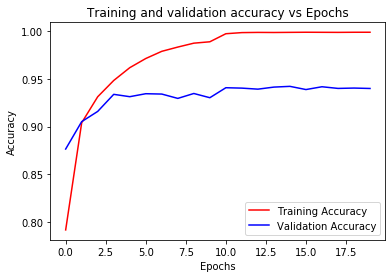

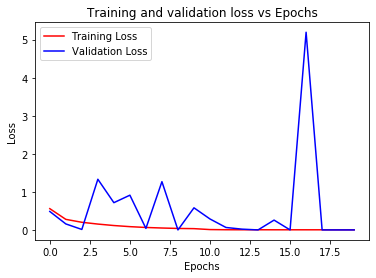

In [30]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and validation accuracy vs Epochs')
plt.legend()
accuracy_fig_name = "accuracy.png"
plt.savefig(char + '/' + accuracy_fig_name)
plt.show()


plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and validation loss vs Epochs')
plt.legend()
loss_fig_name = "loss.png"
plt.savefig(char + '/' + loss_fig_name)
plt.show()

## Performance

In [31]:
training_accuracy = train_score[1]*100
validation_accuracy = val_score[1]*100
test_accuracy = test_score[1]*100

print("The training accuracy is: " + str(training_accuracy) + ' %')
print("The validation accuracy is: " + str(validation_accuracy) + ' %')
print("The test accuracy is: " + str(test_accuracy) + ' %')

The training accuracy is: 99.9110221862793 %
The validation accuracy is: 94.21418309211731 %
The test accuracy is: 93.57776045799255 %


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = []
y_true = test_generator.classes

for i in range(len(classes)):
    for filename in os.listdir(test_class[i-1]):
        file = os.path.join(test_class[i-1], filename)
        img = image.load_img(file, target_size=(dim[1], dim[0]))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])

        pred = model.predict(images, batch_size = batch_size)
        pred_max = max_pred(pred)
        #print(pred_max)
        
        y_pred.append(pred_max)

        
y_pred_rev =  [ele for ele in reversed(y_pred)] 
      
print("Calculating CLASSIFICATION REPORT..........:")
classification_report = classification_report(y_true, y_pred, target_names=labels)
print(classification_report)

print("\nCalculating SENSITIVITY & SPECIFICITY..........:")
cm = confusion_matrix(y_true, y_pred)
total = sum(sum(cm))
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print("sensitivity = {:.4f}".format(sensitivity))
print("specificity = {:.4f}".format(specificity))

Calculating CLASSIFICATION REPORT..........:
              precision    recall  f1-score   support

         CNV       0.96      0.95      0.96      3720
         DME       0.87      0.91      0.89      1134
      DRUSEN       0.76      0.78      0.77       861
      NORMAL       0.94      0.93      0.94      2631

    accuracy                           0.92      8346
   macro avg       0.88      0.89      0.89      8346
weighted avg       0.92      0.92      0.92      8346


Calculating SENSITIVITY & SPECIFICITY..........:
sensitivity = 0.9889
specificity = 0.9563


## Readme.txt

In [33]:
from contextlib import redirect_stdout

readme_name_text = "readme.txt"
print("Please read the text file named " + readme_name_text + " for detailed information of the model.")

completeName_txt = os.path.join(char, readme_name_text) 

readme = open(completeName_txt, "w")

if class_no > 2:
    readme.write("This is a MULTICLASS CLASSIFICATION")
else:
    readme.write("This is a BINARY CLASSIFICATION")
readme.write("\n" + str(int(VALIDATION_SPLIT_SIZE*100)) + "% data of the RAW Dataset is used for validation")
readme.write("\n" + str(int(TEST_SPLIT_SIZE*100)) + "% data of the RAW Dataset is used for testing")
readme.write("\nThe " + str(source_folder) + " dataset has " + str(class_no) + " classes")
readme.write("\nThe classes are = " + str(classes))
readme.write("\nThe labels are:-")

for z in range(class_no):
    label = str(labels[classes[z]]) + " is labelled for " + str(classes[z])
    readme.write("\n" + str(label))

readme.write("\n\n\n--HYPERPARAMETERS--\n")
readme.write(str(augmentation))
readme.write("\nInitial Learning Rate = " + str(learning_rate))
readme.write("\nMaximum No. of epochs = " + str(epoch))
readme.write("\nBatch Size = " + str(batch_size))
readme.write("\nA model has been created at " + str(source_address))

readme.write("\n\n\n--MODEL-PARAMETERS--")
if monitor == 1:
    readme.write("\nValidation Accuracy of the model has been monitored.")
elif monitor == 2:
    readme.write("\nValidation Loss of the model has been monitored.")
elif monitor == 3:
    readme.write("\nTraining Accuracy of the model has been monitored.")
elif monitor == 4:
    readme.write("\nTraining Loss of the model has been monitored.")

readme.write("\nActivation Function = " + str(activation))
readme.write("\nDropout = " + str(int(dropout*100)) + "%")
readme.write("\nActivation function of the output layer = " + str(output_activation))
readme.write("\nCost function of the model = " + str(losses))
readme.write("\nOptimizer = " + str(optimizer) + "\n\n")

if tl_models == 1:
    readme.write("Trained on VGG16\n")
    with redirect_stdout(readme):
        model.summary()

if tl_models == 2:
    readme.write("Trained on VGG19\n")
    with redirect_stdout(readme):
        model.summary()

if tl_models == 3:
    readme.write("Trained on MobileNet\n")
    with redirect_stdout(readme):
        model.summary()
        
if tl_models == 4:
    readme.write("Trained on ImageNet\n")
    with redirect_stdout(readme):
        model.summary()
        
if tl_models == 5:
    readme.write("Trained on a ResNet Model\n")
    with redirect_stdout(readme):
        model.summary() 
        
if tl_models == 6:
    readme.write("Trained on a Custom Model\n")
    readme.write("Number of layer = " + str(layer))
    readme.write("\nNumber of Conv layer = " + str(conv_layer))
    readme.write("\nFilter size = " + str(conv_size)+ "*" + str(conv_size) + "\n\n")
    with redirect_stdout(readme):
        model.summary()

if tl_models == 8:
    readme.write("Trained using Transfer Learning on a Custom Pre-Trained Model\n")
    with redirect_stdout(readme):
        model.summary()
    
readme.write("\n--MODEL-PERFORMANCE--")
readme.write("\nTraining Accuracy = " + str(training_accuracy) + " %")
readme.write("\nValidation Accuracy = " + str(validation_accuracy) + " %")
readme.write("\nTest Accuracy = " + str(test_accuracy) + " %\n\n")

readme.write("Classification Report:\n")
readme.write(classification_report)

readme.write("\nSensitivity = " + str(int(sensitivity*100)) + " %")
readme.write("\nSpecificity = " + str(int(specificity*100)) + " %")

readme.write("\n\nCreated using Self-Regulated Image Classifier using Convolution Neural Network")

readme.close()

Please read the text file named readme.txt for detailed information of the model.


# test.py
A python program named `test.py` will be created using which the user will be able to test his own images by feeding them into the test folder only.

In [34]:
test_name_py = "test.py"

completeName_py = os.path.join(source_address, test_name_py) 

test = open(completeName_py, "w")

test.write('import numpy as np')
test.write('\nimport os')
test.write('\nimport keras')
test.write('\nfrom keras.models import load_model')
test.write('\nimport shutil')
test.write('\nimport cv2')
test.write('\nimport glob')

source_address_ = '"{}"'.format(source_address)
test_address_ = '"{}"'.format(test_address)
extension_ = '"{}"'.format(extension)
best_model_address = '"{}"'.format(best_model_address)

test.write('\n\nsource_address = ' + str(source_address_))
test.write('\ntest_address = ' + str(test_address_))
test.write('\n\noutput_dir = source_address + "/outputs" + "/"')

test.write('\n\nif not os.path.exists(output_dir):')
test.write('\n    shutil.copytree(test_address, output_dir)')
test.write('\nelse:')
test.write('\n    shutil.rmtree(output_dir)')
test.write('\n    shutil.copytree(test_address, output_dir)')

test.write('\n\nwidth = ' + str(dim[0]))
test.write('\nheight = ' + str(dim[1]))
test.write('\nresized_images = []')

test.write('\n\nfor img in glob.glob(output_dir + "/*" + ' + extension_ + '):')
test.write('\n    image = cv2.imread(img)')
test.write('\n    res = cv2.resize(image, (width, height))')
test.write('\n    resized_images.append(res)')
test.write('\n    dim = resized_images[0].shape')

test.write('\n\na = 0')
test.write('\nr = 0')
test.write('\nclass_no = ' + str(class_no))
test.write('\nclasses = ' + str(classes))
test.write('\nlabels = ' + str(labels))
test.write('\nbatch_size = ' + str(batch_size))
test.write('\n\nmodel = load_model(best_model_address)')
test.write('\n\nfrom keras.preprocessing import image')

test.write('\n\nfor filename in os.listdir(test_address):')
test.write('\n    file = output_dir + filename')
test.write('\n    img = image.load_img(file, target_size = (width, height))')
test.write('\n    x = image.img_to_array(img)')
test.write('\n    x = np.expand_dims(x, axis=0)')

test.write('\n    images = np.vstack([x])')
test.write('\n    pred = model.predict(images, batch_size = batch_size)')
test.write('\n    pred_categorical = keras.utils.to_categorical(pred)')

if class_no > 2:
    test.write('\n    pred_max = np.argmax(pred)')
else:
    test.write('\n    pred_max = np.argmax(pred_categorical)')
    

test.write('\n\n    for r in range(class_no):')
test.write('\n        if pred_max == labels[classes[r]]:')
test.write('\n            name = classes[r]')
test.write('\n        elif pred_max == labels[classes[r]]:')
test.write('\n            name = classes[r]')

test.write('\n\n    os.rename(output_dir + "/" + filename, output_dir + "/" + str(name) + "_" + str(a) + ' + extension_ + ')')
test.write('\n    a += 1')

test.write('\n\n    test_predictions = str(filename) + " belongs to class - " + str(name)')
test.write('\n    print(test_predictions)')

test.write('\n\nprint("Checkout to output folder to check the outputs")')

57